# 🧠 Linear Regression from Scratch with Gradient Descent  

This notebook demonstrates a **manual implementation of Linear Regression** using **Gradient Descent**, without relying on ML libraries like `scikit-learn`.  

- ✅ Generates synthetic dataset  
- ✅ Implements cost function and gradient calculation  
- ✅ Optimizes parameters using gradient descent  
- ✅ Visualizes the fitted line, cost convergence, and cost surface  

Final learned parameters:  
- **Weight (w):** ≈ 3  
- **Bias (b):** ≈ 4  
- **Final Cost:** ~0.41  


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
#to fix  the random number generator seed so that every time we run this code, the same random values are produced.
np.random.seed(42)

In [96]:
#simple generates 100 random numbers between 0-1 and multiplying it by 10 scales the value better
x=np.random.rand(100,1)*10

In [97]:
#parameters that we have set, they indeed are arbitary 
true_w=3
true_b=4

In [98]:
#noise only makes the data a bit more realistic 
noise= np.random.randn(100,1)

In [99]:
#core formula 
y= true_w*x+true_b+noise

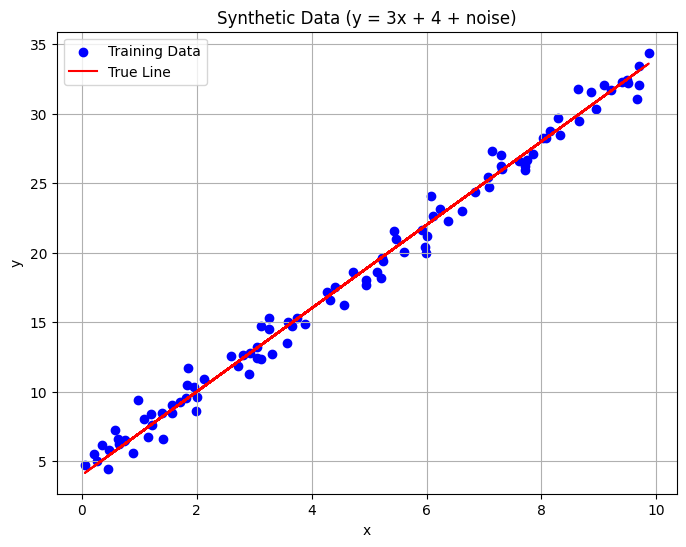

In [100]:
#plotting our synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Training Data')
plt.plot(x, true_w * x + true_b, color='red', label='True Line')
plt.title('Synthetic Data (y = 3x + 4 + noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
#making the cost function
def compute_cost(x, y, w, b):
    m = x.shape[0]  
    total_cost = 0.0

    for i in range(m):
        y_pred= w*x[i]+b
        error= y_pred-y[i]
        total_cost+= error**2

    cost=total_cost/(2*m)
    return cost


In [102]:
#trying out the cost function we see that the results are way off 
initial_w = 0
initial_b = 0
cost = compute_cost(x, y, initial_w, initial_b)
print(f"Initial cost: {cost.item():.4f}")

Initial cost: 202.5144


In [103]:
#this function helps determine the slope of w and b
def compute_gradient(x,y,w,b):
    m= x.shape[0]
    dj_dw=0
    dj_db=0

    for i in range(m):
        f_wb_i= w*x[i]+b
        error= f_wb_i-y[i]
        dj_dw+=error * x[i]
        dj_db+=error
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

In [104]:
#repeatedly adjusts w and b in the direction that reduces cost
def gradient_descent(x,y,w_in,b_in,alpha,num_iter):
    w=w_in
    b=b_in
    j_history=[]

    for i in range(num_iter):
        dj_dw, dj_db= compute_gradient(x,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db
    if i%10==0:
        cost=compute_cost(x,y,w,b)
        j_history.append(cost)
        print(f"Iteration {i:4}: Cost {cost:.4f}, w {w:.4f}, b {b:.4f}")
    return w,b,j_history

In [105]:
#we see that the learned parameters are nearly perfect to our initial values that is w=3 and b=4 
initial_w = 0
initial_b = 0
alpha = 0.01
iterations = 1000

w_final, b_final, J_hist = gradient_descent(x, y, initial_w, initial_b, alpha, iterations)

print(f"\nLearned parameters:\nw = {w_final.item():.4f}\nb = {b_final.item():.4f}")



Learned parameters:
w = 2.9892
b = 3.9865


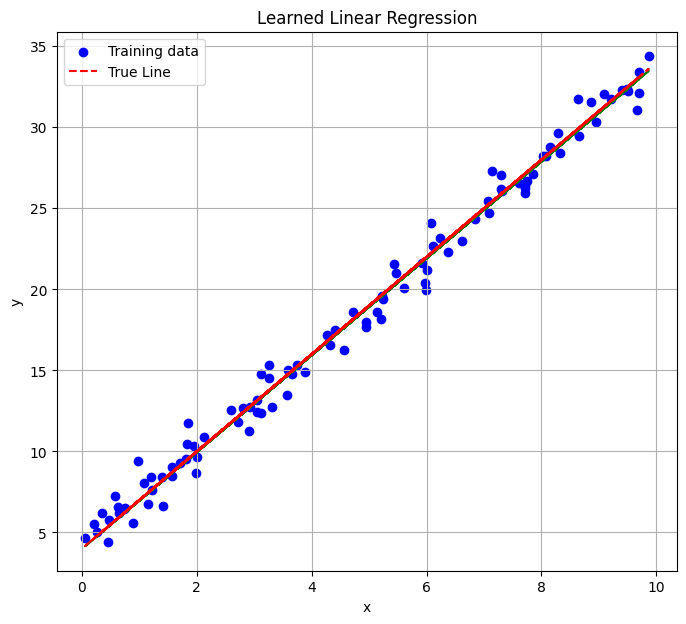

In [106]:
#a linear regression plot to analyse the algorithm 
y_pred=w_final*x+b_final
plt.figure(figsize=(8,7))
plt.scatter(x,y,color="blue",label="Training data")
plt.plot(x,y_pred,color="green")
plt.plot(x, true_w * x + true_b, color='red', linestyle='--', label='True Line')
plt.title('Learned Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
#computing the updated cost of our algorithm
final_cost = compute_cost(x, y, w_final, b_final)
print(f"Final Cost: {final_cost.item():.4f}")

Final Cost: 0.4107


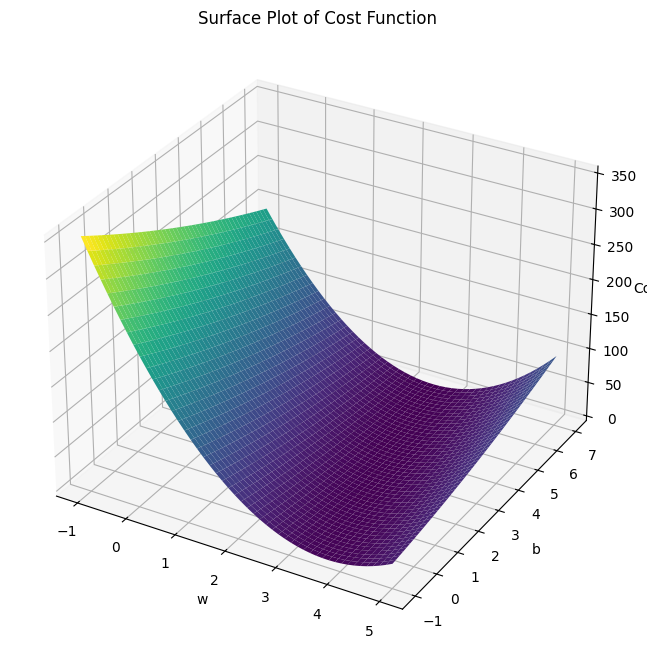

In [108]:
#and finally, a cool surface plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, cost_surface.T, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of Cost Function')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
plt.show()